In [1]:
datadir='/data/public/cryonuseg/tissue images'
gtdir='/data/public/cryonuseg/Annotator 1 (biologist second round of manual marks up)/Annotator 1 (biologist second round of manual marks up)/label masks modify'

In [2]:
# !pip install -r requirements.txt

In [3]:
import glob
from matplotlib import pyplot as plt
import numpy as np


In [4]:
imglist = glob.glob(datadir+'/*.tif')

In [5]:
gtlist = glob.glob(gtdir+'/*.tif')

In [6]:
from skimage.color import rgb2hed, hed2rgb
from skimage.io import imread
from skimage.filters import unsharp_mask
from skimage.exposure import adjust_gamma
from skimage.exposure import rescale_intensity

In [7]:
# img:(gamma,pc)
pcmap={
    0:(1,20),1:(1.2,20),2:(1.2,20),3:(1,20), 4:(1.5, 20), 5:(1.2, 20),
    6:(1.7,30),7:(1.7,30), 8:(1,50),9:(1,50),10:(1,50),11:(1,50),
    12:(1.1,30),13:(1.1,20), 14:(1.3,10), 15:(1.5,20), 16:(1.5,20), 17:(1.2,20),
    18:(1.2,20),19:(1,30),20:(1,30),21:(0.8,45),22:(0.8, 45), 23:(1,30),
    24:(1,40), 25:(1,50), 26:(1.2,20), 27:(1.3,15), 28:(1.2,15), 29:(1.5,15)
      }

In [26]:
num = 1
gamma,pcmax = pcmap[num]

In [27]:

im1=imread(imglist[num])

In [28]:
im1 = unsharp_mask(im1)

In [29]:
im1.shape

(512, 512, 3)

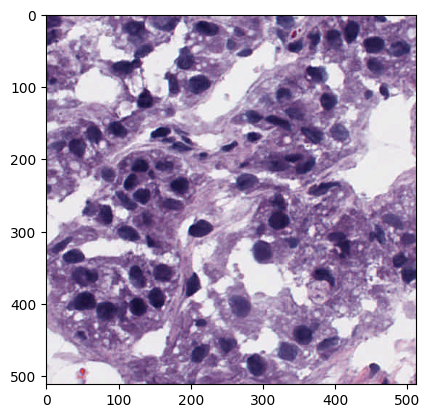

In [30]:
plt.imshow(im1)

In [31]:
im1_hed = rgb2hed(im1)

In [32]:
null = np.zeros_like(im1[:, :, 0])
im1_h = hed2rgb(np.stack((im1_hed[:, :, 0], null, null), axis=-1))

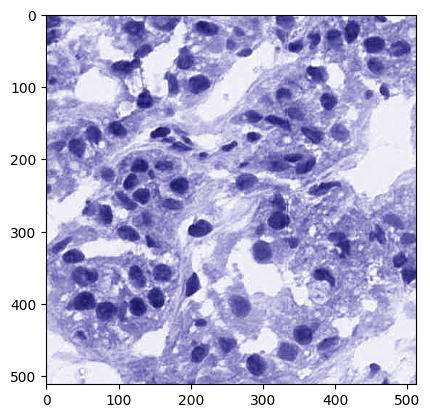

In [33]:
plt.imshow(im1_h)

In [34]:
gt1=imread(gtlist[num])

In [35]:


h2 = adjust_gamma(im1_h,gamma)

h3 = rescale_intensity(h2, out_range=(0, 0.9),
                      in_range=(0, np.percentile(im1_h, pcmax)))

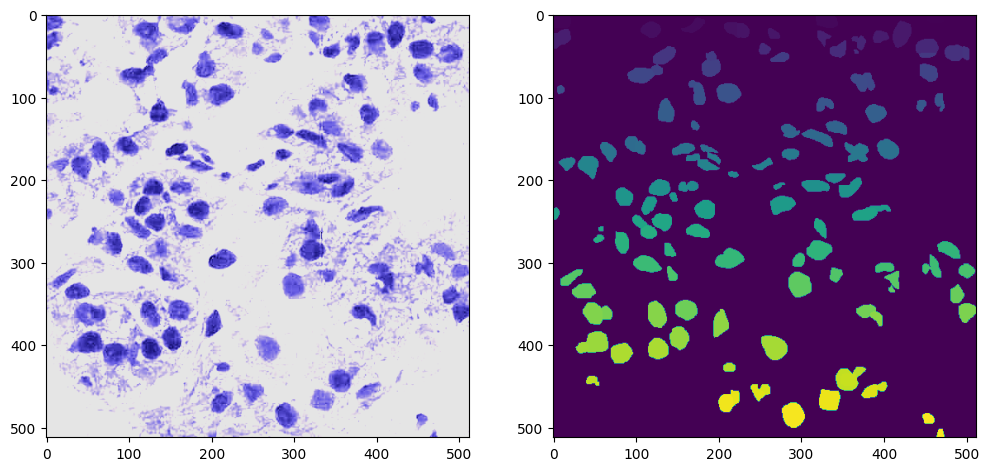

In [36]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(h3)

plt.subplot(1,2,2)
plt.imshow(gt1)

In [37]:
gt1.max()

132